## **1.1 Clone repository**

## **1.2 Create environment**

## **1.3 Install Requirements**

## **1.4 Import Data**

In [6]:
import pandas as pd
import numpy as np

In [7]:
X = pd.read_csv (r'../data/raw/train_data.csv', header=None)
y = pd.read_csv (r'../data/raw/train_labels.csv', names = ['target'], header=None)

In [5]:
X.shape

NameError: name 'X' is not defined

In [4]:
X.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2209,8.838,141.743,4428.484,93956.883,12855.571,-17.476,-1454.401,-1038.448,-677.951,3.468,...,323.420,132.442,598.984,-27.841,863.633,-516.108,-53.469,635.449,-856.789,550.888
536,-25.703,-161.152,-64509.282,-6982.497,-2440.593,105.520,578.773,-398.182,375.261,14.146,...,-179.928,660.788,227.015,-999.824,-1411.986,321.435,135.885,-161.754,-642.973,1780.152
721,250.061,269.562,7545.885,-23854.613,-14985.911,-41.218,-1258.938,-563.235,851.656,209.505,...,-553.018,-976.312,191.656,53.986,671.048,-219.098,-274.372,-899.452,-489.246,662.768
2172,-410.934,-200.311,-6891.879,105140.037,-3794.936,523.670,529.766,-874.052,460.056,171.939,...,77.281,219.849,-319.515,66.146,713.350,796.963,-165.099,542.303,38.806,339.024
1889,138.341,-117.442,3050.779,4926.820,17017.087,-151.561,-1339.004,798.648,-246.699,-347.354,...,-299.034,-166.603,-131.311,592.141,-1663.905,40.602,-182.125,341.353,-138.329,-289.077
1887,-17.855,23.413,40995.544,-52151.683,-5293.566,-174.160,936.010,-314.951,-1.875,-95.049,...,-158.983,22.954,-97.733,125.599,851.996,624.897,-434.478,-407.328,-1065.380,-1035.682
601,161.653,-247.140,-96254.890,35279.705,-28521.876,663.862,873.961,-300.368,-1075.500,-309.219,...,-246.561,507.520,266.745,-243.021,152.994,707.344,-94.241,-88.448,505.325,211.454
846,101.364,-311.234,29285.683,-34329.130,-19090.855,864.829,1154.678,1397.807,561.782,-102.083,...,-176.230,562.164,-146.988,381.121,465.639,333.826,1.026,349.676,-209.535,-704.583
1459,303.046,-6.599,22739.899,-105727.297,26583.402,-540.254,132.523,-159.507,441.134,-405.214,...,-10.723,-251.864,367.934,385.078,-271.310,-1051.829,236.590,-582.902,-505.388,592.328
2044,254.553,-39.564,80742.885,31854.101,-4987.829,-739.441,-775.549,-104.860,147.818,77.255,...,-33.957,126.025,26.785,247.681,-713.651,-44.772,-185.516,-1321.664,379.500,-58.001


# **2. EDA**

## **2.1 Descriptive analysis**

### Count all types of columns

```
We have only numerics type of columns
```

In [5]:
X.dtypes.value_counts()

float64    10000
dtype: int64

In [6]:
y.value_counts()

target
 1        3375
-1         375
dtype: int64

## **Missing Values**

In [7]:
X.isnull().sum().sum()

0

# Duplicates

In [8]:
X.duplicated().sum()

0

## Lets see basic metrics in dataset

```
We see that we have high values ​​and that the average will not show any meaningful data
Variance shows how the data are similar to each other
```

In [43]:
df_desc = X.describe().drop('count').T
df_desc['var'] = df_desc['std']**2
df_desc

,mean,std,min,25%,50%,75%,max,var
0,30.644135,286.172414,-989.450,-163.78175,35.4785,215.78050,1224.394,8.189465e+04
1,9.080955,213.166659,-859.922,-135.34350,2.6805,156.09575,722.868,4.544002e+04
2,169.679419,43665.003613,-163336.428,-29284.11950,1181.6985,29630.91450,177744.241,1.906633e+09
3,811.083532,57123.457110,-243844.632,-38028.42900,980.5880,40561.96025,215372.854,3.263089e+09
4,-186.008805,21942.466227,-77566.109,-14426.79950,-154.8350,14515.83300,86287.955,4.814718e+08
...,...,...,...,...,...,...,...,...
9995,-1.426345,655.666258,-2165.769,-432.00075,-3.7965,425.33800,2562.331,4.298982e+05
9996,9.597250,204.731554,-739.205,-129.07625,8.6005,149.85575,685.176,4.191501e+04
9997,-2.031243,793.022407,-2731.037,-561.30400,-4.2430,539.55000,3123.617,6.288845e+05
9998,-2.841237,629.128655,-2223.909,-424.19275,-7.6280,427.79450,2204.527,3.958029e+05


Select coloumns to verify outliers

In [68]:
#def min_max_50(df):
#    df_desc = df.describe().T
#    df_desc['min-50'] = (pd.Series.abs(df_desc['50%'] - df_desc['min']))/df_desc['50%']
#    df_desc['max-50'] = (pd.Series.abs(df_desc['50%'] - df_desc['max']))/df_desc['50%']
#    return df_desc[['50%', 'min-50', 'max-50']]

#df_outliers_desc = min_max_50(X)
#df_outliers_desc_min = df_outliers_desc.sort_values('max-50', ascending=False)
#df_outliers_desc_min = df_outliers_desc_min[(df_outliers_desc_min['min-50'] > 7000) | (df_outliers_desc_min['max-50'] > 7000)]
#df_outliers_desc_min

### We randomly select 3 columns and look at their distributions of several systems, we see that the column layout of normal systems

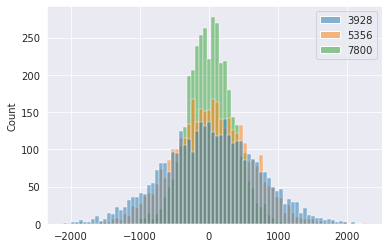

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=X.sample(n=3, axis='columns'))
plt.savefig('../visualizations/data_distribution.png')

after a few reloads, the columns show that we are dealing with data that are not linearly separable

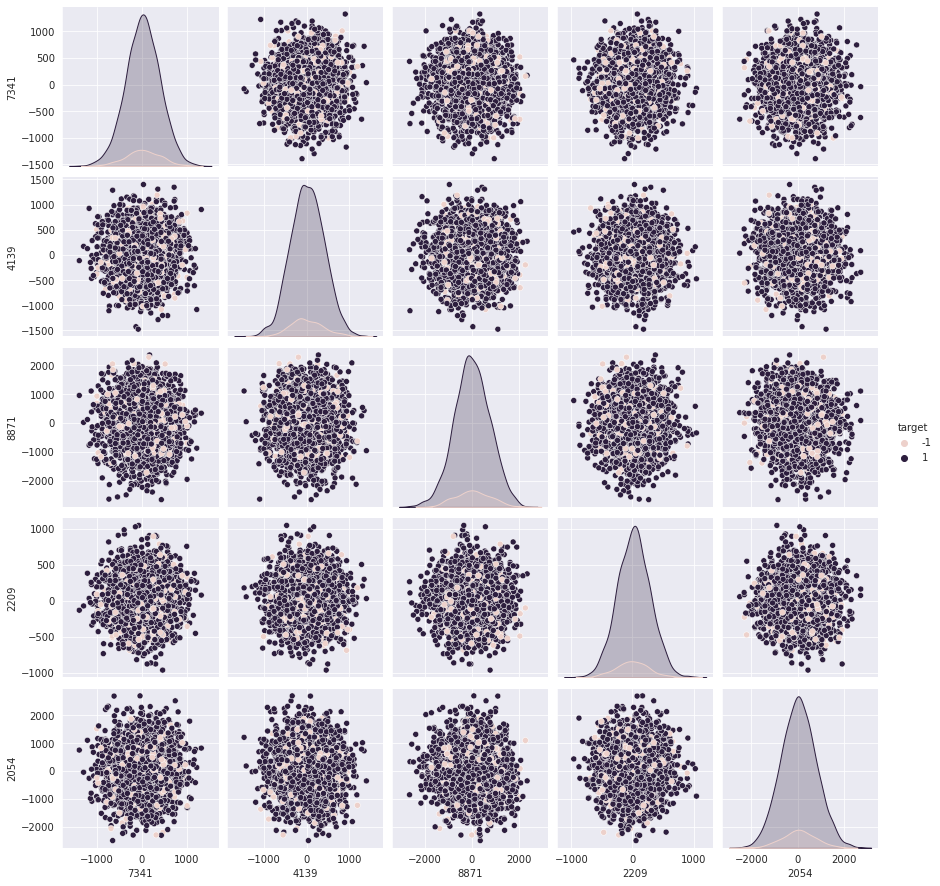

In [12]:
df_sample = X.sample(n=5, axis='columns')
df_sample['target'] = y['target']

sns.pairplot(df_sample, hue='target')
plt.savefig('../visualizations/data_pairplot.png')